#Importando Bibliotecas


In [19]:
# Regular EDA (Exploratory And Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay, plot_confusion_matrix
from google.colab import files
uploaded = files.upload()

%matplotlib inline

Saving heart.csv to heart (1).csv


# Carregar Dataset

In [20]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Dicionário Variáveis
- age in years
- sex (1 = male , 0 = femal)
- cp(chest pain type):
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- trestbps(resting blood pressure) in mm Hg on admission to the hospital)
- chol(serum cholestoral) in mg/dl
- fbs(fasting blood sugar) > 120 mg/dl (1 = true , 0 = false)
- restecg(resting electrocardiographic results):
     - 0: normal
     - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach(maximum heart rate achieved)
- exang(exercise induced angina) (1 = yes , 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope(the slope of the peak exercise ST segment):
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- ca number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target 0 = No Diesase , 1 = Diesase

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [23]:
# Números nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Análise de Dados

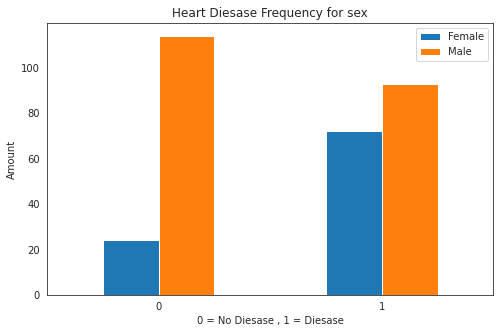

In [24]:
# Heart Diesase Frequency for sex
pd.crosstab(df.target, df.sex).plot(figsize=(8,5), kind='bar')
plt.title("Heart Diesase Frequency for sex")
plt.xlabel("0 = No Diesase , 1 = Diesase")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

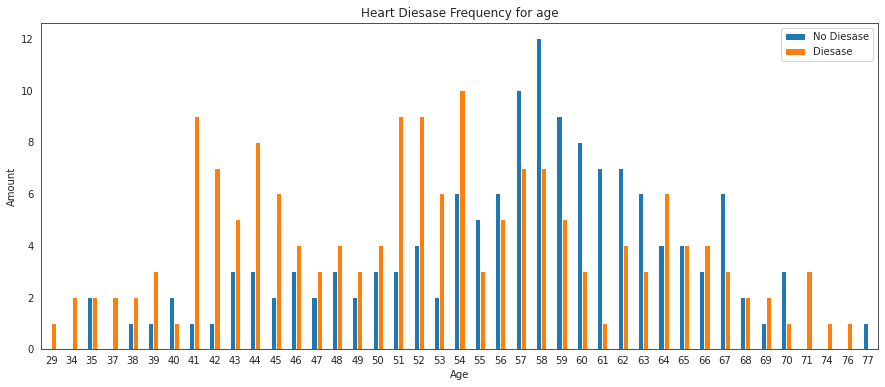

In [25]:
pd.crosstab(df.age, df.target).plot(figsize=(15,6), kind='bar')
plt.title("Heart Diesase Frequency for age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

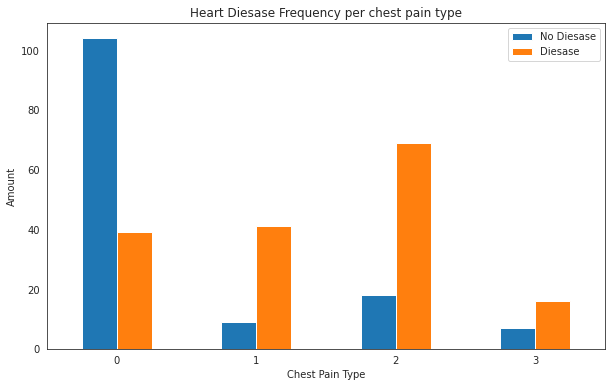

In [26]:
# Heart Diesase Frequency per chest pain type
pd.crosstab(df.cp, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

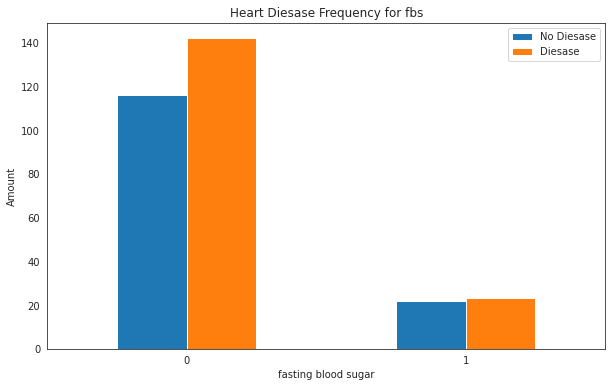

In [27]:
# Heart Diesase Frequency for fbs
pd.crosstab(df.fbs, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency for fbs")
plt.xlabel("fasting blood sugar") #(1 = true , 0 = false)
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

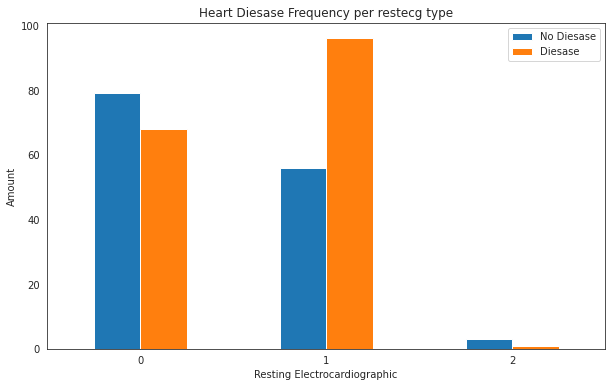

In [28]:
# Heart Diesase Frequency per restecg type
pd.crosstab(df.restecg, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency per restecg type")
plt.xlabel("Resting Electrocardiographic")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

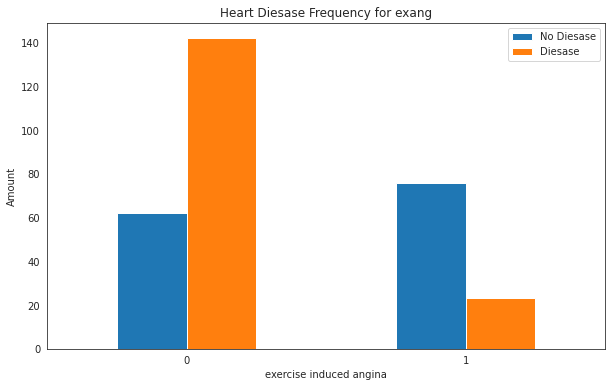

In [29]:
# Heart Diesase Frequency for exang
pd.crosstab(df.exang, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency for exang")
plt.xlabel("exercise induced angina")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

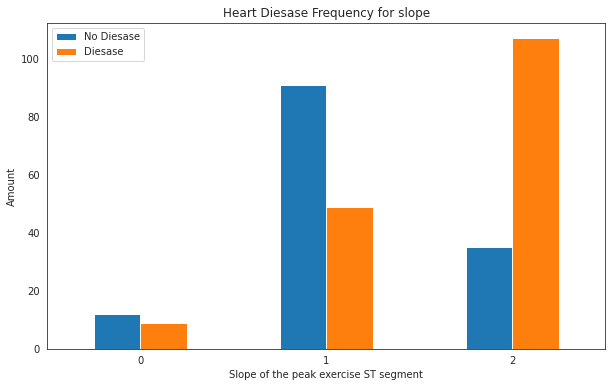

In [30]:
# Heart Diesase Frequency per slope type
pd.crosstab(df.slope, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency for slope")
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

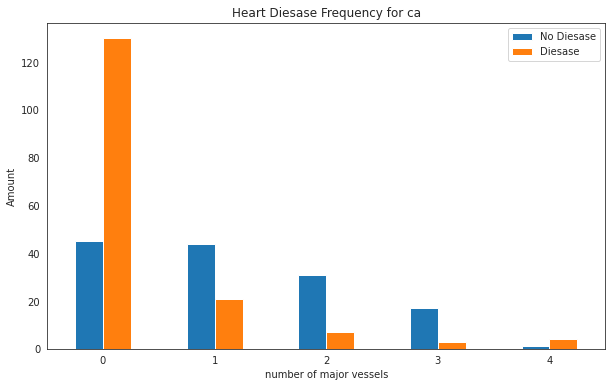

In [31]:
# Heart Diesase Frequency for ca
pd.crosstab(df.ca, df.target).plot(figsize=(10,6), kind='bar')
plt.title("Heart Diesase Frequency for ca")
plt.xlabel("number of major vessels")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

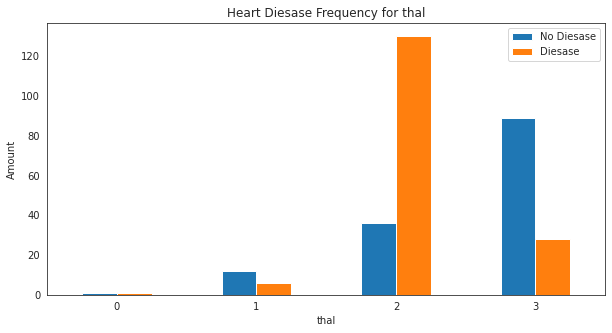

In [32]:
# Heart Diesase Frequency for thal
pd.crosstab(df.thal, df.target).plot(figsize=(10,5), kind='bar')
plt.title("Heart Diesase Frequency for thal")
plt.xlabel("thal")
plt.ylabel("Amount")
plt.legend(["No Diesase", "Diesase"])
plt.xticks(rotation=0)
plt.show()

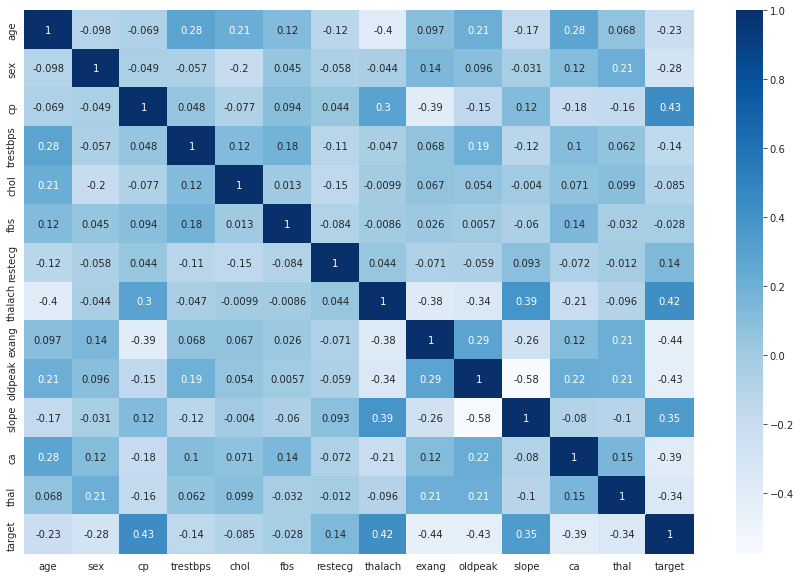

In [33]:
# Correlation matrix
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [34]:
# Check missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
#Ensure that all numeric columns contain numeric values using (pd.to_numeric) 
numerical_colms = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
                   
for col in numerical_colms:
    df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' parsing will be set as NaN

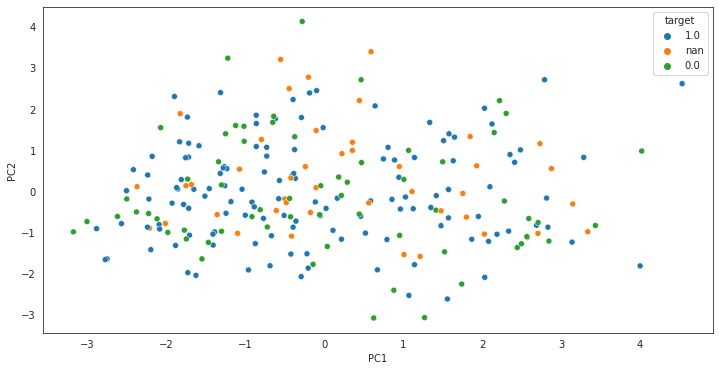

In [47]:
from sklearn.decomposition import PCA
pca = PCA(2)

pca.fit(X_train)

pca.transform(X_train)

pca_df = pd.DataFrame(pca.transform(X_train), columns = ['PC1', 'PC2'])
pca_df['target'] = y_train

pca_df['target'] = pca_df['target'].astype('str')

plt.figure(figsize=(12,6))
sns.scatterplot(x='PC1', y='PC2', hue = 'target', data = pca_df)
plt.show()

# Dividindo em treino e teste

In [36]:
x_data = df.iloc[:,:13]
y_data = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=43)

# Feature Scaling

In [37]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Machine Learning - Treinando modelos
- LogisticRegression
- SVC
- KNeighborsClassifier
- RandomForestClassifier

In [38]:
models = {
    'LR'   : LogisticRegression(),
    'SVC'  : SVC(),
    'KNNC' : KNeighborsClassifier(),
    'RFC'  : RandomForestClassifier(),
}   

In [39]:
models_name = list(models.keys())
accuracy_values = list()

In [40]:
for name, model in models.items():
    print(f'Model name: {name}')
    model.fit(X_train, y_train)
    print(f'Train score : {model.score(X_train, y_train)}')
    print(f'Test score : {model.score(X_test, y_test)}')
    accuracy_values.append(model.score(X_test, y_test))
    print('-' * 30)

Model name: LR
Train score : 0.8347107438016529
Test score : 0.8852459016393442
------------------------------
Model name: SVC
Train score : 0.8966942148760331
Test score : 0.8688524590163934
------------------------------
Model name: KNNC
Train score : 0.859504132231405
Test score : 0.8688524590163934
------------------------------
Model name: RFC
Train score : 1.0
Test score : 0.8852459016393442
------------------------------


# Hyperparameter
* LogisticRegression
* RandomForestClassifier
* SVC

In [41]:
# Create a hyperparameter grid for LogisticRegression
lgr_grid = {"solver":['liblinear','lbfgs'],"C": np.logspace(-1,1,20)}

rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=lgr_grid, cv=5, n_iter=20, verbose=True, n_jobs=-1)
rs_lr.fit(X_train, y_train)

print(rs_lr.best_params_)
print(rs_lr.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'solver': 'lbfgs', 'C': 0.16237767391887217}
0.8852459016393442


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [42]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'bootstrap': [True, False],
               'max_depth': [10,20,30,40,50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,20),
               'min_samples_split': np.arange(2,20),
               'n_estimators': np.arange(10,600,50)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5,  n_iter=20, verbose=True, n_jobs=-1)
rs_rf.fit(X_train, y_train)

print(rs_rf.best_params_)
print(rs_rf.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s


{'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
0.9016393442622951


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.5s finished


In [43]:
# Create a hyperparameter grid for SVC
rs_svc_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

rs_svc = RandomizedSearchCV(SVC(), param_distributions=rs_svc_grid, cv=5, n_iter=20, verbose=True, n_jobs=-1)
rs_svc.fit(X_train, y_train)

print(rs_svc.best_params_)
print(rs_svc.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'kernel': 'linear', 'gamma': 1, 'C': 1}
0.8852459016393442


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


# Hyperparameter GridSearchCV
* LogisticRegression
* RandomForestClassifier
* SVC

In [44]:
# Create a hyperparameter for LogisticRegression
lg_grid = {"solver":['liblinear','lbfgs'],"C": np.logspace(-1,1,30)}
gs_lg = GridSearchCV(LogisticRegression(), param_grid=lg_grid, cv=5, verbose=True, n_jobs=-1)
gs_lg.fit(X_train, y_train)

print(gs_lg.best_params_)
print(gs_lg.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.1, 'solver': 'liblinear'}
0.8852459016393442


[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


In [45]:
# Create a hyperparameter for RandomForestClassifier
rf_grid = {"bootstrap": [True],
           "max_depth" : [80, 90, 100, 110],
           "max_features": [2, 3],    
           "min_samples_leaf": [3, 4, 5],   
           "min_samples_split": [8, 10, 12],     
           "n_estimators": [100, 200, 300, 1000]}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True, n_jobs=-1)
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
print(gs_rf.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min


KeyboardInterrupt: ignored

In [ ]:
# Using best parameters to RandomForestClassifier from GridSearchCV() to predict y_pred values
rf_model = RandomForestClassifier(bootstrap=True, max_depth= 100, max_features=2, 
                                  min_samples_leaf=5, min_samples_split= 8, n_estimators=100)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test,y_test))
y_pred = rf_model.predict(X_test)
y_pred

In [ ]:
# Create a hyperparameter for SVC
gs_svc_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

gs_svc = GridSearchCV(SVC(), param_grid=gs_svc_grid, cv=5, verbose=True, n_jobs=-1)
gs_svc.fit(X_train, y_train)

print(gs_svc.best_params_)
print(gs_svc.score(X_test, y_test))

# Evaluating our tuned machine learnig classifier
* ROC and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

### Plot ROC and AUC metric

In [ ]:
plot_roc_curve(gs_rf, X_test, y_test);

### Confusion matrix

In [ ]:
sns.set(font_scale = 1.3)

def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
# Calling function
plot_conf_mat(y_test, y_pred)   

 ### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Cross-validated accuracy
acc = cross_val_score(rf_model, x_data, y_data, cv=5, scoring="accuracy")
acc = np.mean(acc)
print("Cross-validated accuracy: ", acc)

In [ ]:
# Cross-validated precision
prec = cross_val_score(rf_model, x_data, y_data, cv=5, scoring="precision")
prec = np.mean(prec)
print("Cross-validated precision: ", prec)

In [ ]:
# Cross-validated recall
recl = cross_val_score(rf_model, x_data, y_data, cv=5, scoring="recall")
recl = np.mean(recl)
print("Cross-validated recall: ", recl)

In [ ]:
# Cross-validated F1-score
f1_ = cross_val_score(rf_model, x_data, y_data, cv=5, scoring="f1")
f1_ = np.mean(f1_)
print("Cross-validated F1-score: ", f1_)

In [ ]:
# Visualize Cross-validated
cv_mtrx = {"Accuracy" : acc, "Precision": prec, "Recall"   : recl, "F1-score" : f1_}

fig,ax=plt.subplots(figsize=(8,3))
sns.barplot(x=list(cv_mtrx.keys()), y=list(cv_mtrx.values()),alpha=.6, ax=ax)
plt.show()

In [ ]:
# Using best parameters for RandomForestClassifier from GridSearchCV() to predict y_pred values
rf_model = RandomForestClassifier(bootstrap=True, max_depth= 100, max_features=2, 
                                  min_samples_leaf=5, min_samples_split= 8, n_estimators=100)
rf_model.fit(X_train, y_train)
print("Testing score", rf_model.score(X_test,y_test))
y_pred = rf_model.predict(X_test)

In [ ]:
print(f'Roc Auc Score:{roc_auc_score(y_test, y_pred)}')